# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff

from scipy.cluster.hierarchy import linkage


In [2]:
def import_data():
    sample_data_UNC = 'C:/Users/PKchu/Desktop/UHD/SPRING 2021/Senior Project/Soibam/h1.csv'
    sample_data_list = pd.read_csv(sample_data_UNC)
    
    feature_rows = sample_data_list.Boundary
    sample_data_list.pop("Boundary") #get rid of boundary labels/col
    
    sample_data = np.array(sample_data_list, dtype = object) #convert data types to objects for manipulation
    
    feature_rows = np.array(feature_rows, dtype = object)
    feature_columns = np.array(['CTCF', 'DNase', 'H2A', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1'], dtype = object)

    
    return sample_data, feature_rows, feature_columns, sample_data_list #data[0] = numpy.ndarray, data[3] = pandas df

In [3]:
data = import_data()

# Stat Data

In [4]:
data_pts = data[3] #df object for .describe()
statData = data_pts

statData.describe(percentiles = None,
                  include = 'all'
                 )

CTCF        DNase          H2A      H3K27ac     H3K27me3  \
count  2602.000000  2602.000000  2602.000000  2602.000000  2602.000000   
mean    164.740477   224.263978   148.377955   150.663993   143.028997   
std     101.039152   128.615555    64.940313    92.562052   206.279585   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     101.352500   140.002500   102.017500   103.457500    87.297500   
50%     133.800000   198.290000   146.765000   131.655000   111.760000   
75%     219.782500   274.690000   195.080000   172.942500   145.167500   
max     673.590000  1843.490000   368.030000  1144.940000  3947.380000   

          H3K36me3      H3K4me1      H3K4me2      H3K4me3     H3K79me2  \
count  2602.000000  2602.000000  2602.000000  2602.000000  2602.000000   
mean    196.713766   120.457940   159.940284   166.703290   162.036483   
std     163.110501    62.129283   173.408019   207.744977    70.035695   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     102.247500    80.002500    54.302500    68.700000   126.882500   
50%     126.260000   109.650000    86.710000    80.140000   155.415000   
75%     234.587500   151.555000   198.290000   113.227500   185.125000   
max    1266.890000   479.310000  1209.260000  1810.500000   898.730000   

            H3K9ac      H3K9me3     H4K20me1  
count  2602.000000  2602.000000  2602.000000  
mean    147.821026   143.561630   182.337875  
std      80.764357    69.046818    81.530219  
min       0.000000     0.000000     0.000000  
25%     108.262500   114.622500   131.247500  
50%     134.085000   133.825000   170.725000  
75%     161.540000   157.220000   226.400000  
max     831.540000   992.720000   650.610000

# Linkage Matrices 

In [5]:
Z_linkage_Matrix_complete = linkage(data_pts, 'complete', metric='cosine')
Z_linkage_Matrix_average = linkage(data_pts, 'average', metric='cosine') #create linkage matrix for cpcc
Z_linkage_Matrix_single = linkage(data_pts, 'single', metric='cosine')

Z_linkage_Matrix_ward_euclidean = linkage(data_pts, 'ward', metric='euclidean') ######## WARD MUST BE EUCLIDEAN METRIC ########
Z_linkage_Matrix_average_euclidean = linkage(data_pts, 'average', metric='euclidean')

# Cophenetic Correlation Coefficient

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Euclidean CCC

In [7]:
#Z_linkage_Matrix_average = linkage(data_pts, 'average', metric='euclidean')
c, coph_dists = cophenet(Z_linkage_Matrix_average_euclidean, pdist(data_pts))
c

0.9001333140714608

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cosine CCC

In [8]:
c, coph_dists = cophenet(Z_linkage_Matrix_average, pdist(data_pts))
c

0.5594144811464128

# Cluster Data

In [9]:
import time as time

from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
#from sklearn.neighbors import kneighbors_graph


In [10]:
############fcluster(must have a cut/slice distance to define clusters)
#clusters = fcluster(Z_linkage_Matrix_average, cosine_slice_distance, criterion='distance')

#print(clusters, sep='\n')
#max_clusters = max(clusters)

#print("Range = 1 -> n. Max clusters: ", max_clusters, "\n")
#print(len(clusters), "cluster labels \n")
#print(", ".join(str(x) for x in clusters))

In [11]:
max_silhouette = 0
optimal_clusters = 2

max_silhouette_eucl = 0
optimal_clusters_eucl = 2
optimal_linkage = ""

linkage = ['average', 'complete', 'single']
linkage_eucl = ['average', 'complete', 'single', 'ward']
Z_Matrix_linkage = {
    'average': Z_linkage_Matrix_average,
    'complete': Z_linkage_Matrix_complete,
    'single': Z_linkage_Matrix_single,
    'ward_eucl': Z_linkage_Matrix_ward_euclidean,
    'average_eucl': Z_linkage_Matrix_average_euclidean
}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
max_silhouette = [0]

#COSINE
for n_clusters in range_n_clusters:
    print("\n")
    print(f"{n_clusters} clusters")
    
    for linkage_method in linkage: #looks to dictionary to "automate" switching/building linkages
        st = time.time() #Find approximate elapsed clustering time
        Z_Matrix_linkage[linkage_method] = AgglomerativeClustering(linkage = linkage_method, affinity = 'cosine', n_clusters = n_clusters)
        agglomerative = Z_Matrix_linkage[linkage_method].fit_predict(data_pts)
        elapsed_time = time.time() - st
        
        silhouette_score_calc = silhouette_score(data_pts, agglomerative)
        
        if(silhouette_score_calc > max_silhouette[0]):
            max_silhouette.clear()
            max_silhouette = [silhouette_score_calc]
            optimal_clusters = [n_clusters]
            optimal_linkage = [linkage_method]

        if(silhouette_score_calc == max_silhouette[0]):
            max_silhouette.append(silhouette_score_calc)
            optimal_clusters.append(n_clusters)
            optimal_linkage.append(linkage_method)
            
        #print(f"Number of clusters = {Z_Matrix_linkage[linkage_method].n_clusters_}")
        print(f"%.2fs '{linkage_method}' silhouette score = {silhouette_score_calc}" % elapsed_time)





2 clusters
0.24s 'average' silhouette score = 0.16260956390620832
0.29s 'complete' silhouette score = 0.16260956390620832
0.15s 'single' silhouette score = 0.16114609125128887


3 clusters
0.26s 'average' silhouette score = 0.16154824895347816
0.25s 'complete' silhouette score = 0.09668882824925033
0.11s 'single' silhouette score = 0.16154824895347816


4 clusters
0.25s 'average' silhouette score = 0.1549914688940693
0.24s 'complete' silhouette score = 0.0522972723616194
0.11s 'single' silhouette score = 0.15655393156271755


5 clusters
0.24s 'average' silhouette score = 0.17357568449562485
0.22s 'complete' silhouette score = 0.05543972481402855
0.13s 'single' silhouette score = 0.15499698118059427


6 clusters
0.30s 'average' silhouette score = 0.15169070796898249
0.22s 'complete' silhouette score = 0.07481175028791641
0.11s 'single' silhouette score = 0.15335337278589709


7 clusters
0.23s 'average' silhouette score = 0.11790904546684866
0.22s 'complete' silhouette score = 0.203711

In [12]:
for n in range(len(optimal_linkage)):
    #fitting to optimal clusters after finding
    Z_Matrix_linkage[optimal_linkage[n]] = AgglomerativeClustering(linkage = optimal_linkage[n], affinity = 'cosine', n_clusters = optimal_clusters[n])
    agglomerative = Z_Matrix_linkage[optimal_linkage[n]].fit_predict(data_pts)
    
    print(f"\x1b[91mBest silhouette score = '{optimal_linkage[n]}' {max_silhouette[n]} on {optimal_clusters[n]} clusters.\x1b[0m") #ANSI escape codes..
    print("\n")   
  

Best silhouette score = 'complete' 0.20371188110840469 on 7 clusters.


Best silhouette score = 'complete' 0.20371188110840469 on 7 clusters.




In [13]:
print("Range = 1 -> n. Optimal clusters: ", optimal_clusters[0], "\n")
print(len(agglomerative), "cluster labels \n")
print(", ".join(str(x) for x in agglomerative))

Range = 1 -> n. Optimal clusters:  7 

2602 cluster labels 

2, 0, 5, 5, 3, 3, 6, 3, 3, 0, 2, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 2, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 2, 5, 5, 0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 6, 2, 6, 0, 2, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 0, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3, 2, 2, 2, 3, 0, 0, 5, 2, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 5, 3, 0, 2, 0, 0, 2, 2, 0, 2, 0, 6, 0, 0, 6, 0, 2, 2, 0, 0, 2, 0, 0, 

# Silhouette Visualization

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features import RadViz
from sklearn.metrics import silhouette_samples


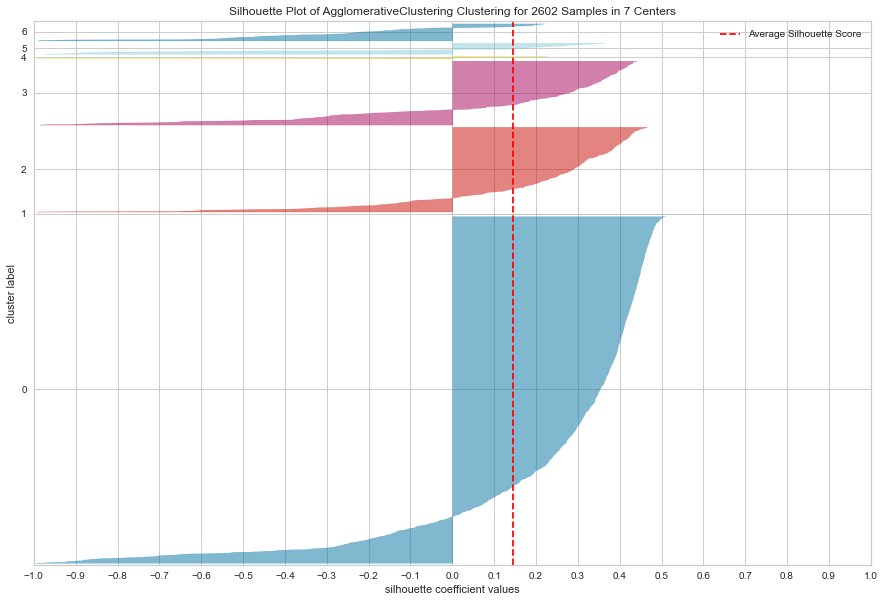

<AxesSubplot:title={'center':'Silhouette Plot of AgglomerativeClustering Clustering for 2602 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
# Instantiate the clustering model and visualizer

# Instantiate the visualizer using the ``size`` param
visualizer = RadViz(size=(1080, 720))

model = AgglomerativeClustering(linkage = optimal_linkage[0], affinity = 'cosine', n_clusters = optimal_clusters[0])
visualizer = SilhouetteVisualizer(model, is_fitted = True, colors='yellowbrick')

visualizer.n_samples_ = data_pts.shape[0]
visualizer.n_clusters_ = Z_Matrix_linkage[optimal_linkage[0]].n_clusters_
visualizer.silhouette_samples_ = silhouette_samples(data_pts, agglomerative)
visualizer.silhouette_score_ = silhouette_score_calc
#visualizer.y_tick_pos_ = [263.5, 1058.0, 1767.5, 1994.0, 2165.5, 2318.5, 2363.0, 2530.0]

visualizer.draw(agglomerative)
#visualizer.fit(data_pts, agg_avg)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Create Dendrograms

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

#### Slice Distance

In [36]:
#fcluster needs slice distance
cosine_slice_distance = 0.62

In [37]:
Z_linkage_Matrix_optimal = linkage(data_pts, optimal_linkage[0], metric='cosine')
#Z_linkage_Matrix_average = linkage(data_pts[0], 'average', metric='cosine')
#linkage_array = linkage(data_pts, 'average', metric='cosine')
#Z_linkage_Matrix_average = linkage(data_pts, 'single', metric='cosine')####################ORIG
optimal_linkage[0]

'complete'

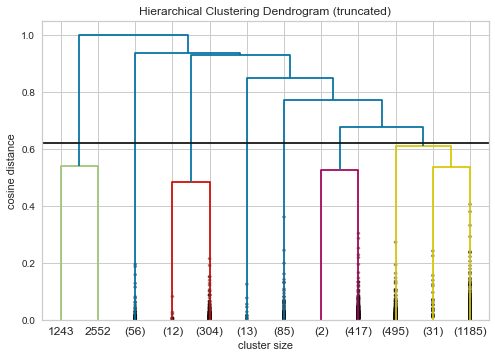

In [38]:
#########################################################################################################
linkage_array = Z_linkage_Matrix_optimal #linkage(data_pts, optimal_linkage[0], metric='cosine') #

#Plot dendrogram for the linkage_array distances between clusters
#dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array, 
           truncate_mode='lastp', p=12, 
           color_threshold = cosine_slice_distance,
           show_contracted=True,  # to get a distribution impression in truncated branches
          )
plt.axhline(y = cosine_slice_distance, c='k')

plt.xlabel('cluster size')
plt.ylabel('cosine distance')
plt.show()

In [39]:
print("Range = 1 -> n. Max clusters: ", optimal_clusters[0], "\n")
print(f"0 -> {max(agglomerative)} cluster labels \n")
print(", ".join(str(x) for x in agglomerative))

Range = 1 -> n. Max clusters:  7 

0 -> 6 cluster labels 

2, 0, 5, 5, 3, 3, 6, 3, 3, 0, 2, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 2, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 2, 5, 5, 0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 6, 2, 6, 0, 2, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 0, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3, 2, 2, 2, 3, 0, 0, 5, 2, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 5, 3, 0, 2, 0, 0, 2, 2, 0, 2, 0, 6, 0, 0, 6, 0, 2, 2, 0, 0, 2, 0, 0, 2,

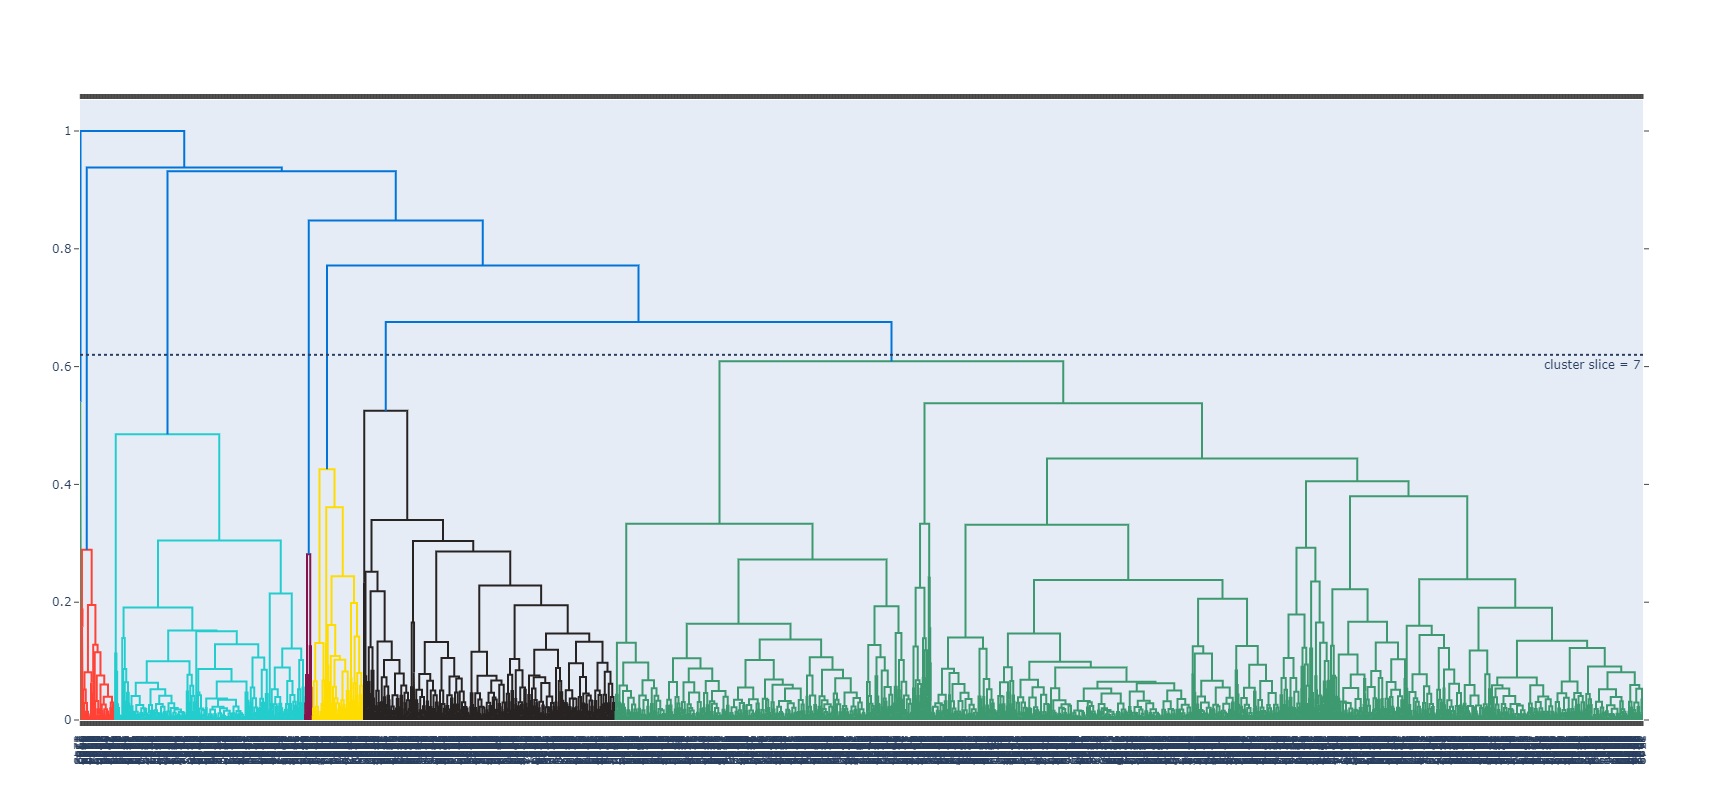

In [46]:
#create_dendrogram returns Plotly figure object. This is a thin wrapper around scipy.cluster.hierarchy.dendrogram.
dendro_plt = ff.create_dendrogram(data[0],
                           #orientation='left',
                           linkagefun=lambda x: linkage(data_pts, optimal_linkage[0], metric='cosine'),
                           #distfun='euclidean', 
                           color_threshold=cosine_slice_distance)
dendro_plt.add_hline(y = cosine_slice_distance, line_dash = "dot", annotation_text = (f"cluster slice = {optimal_clusters[0]}"), annotation_position = "bottom right")

dendro_plt.update_layout(width=1500, height=800)
dendro_plt.show()

# KMeans Elbow Plot

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
#from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer

#model = KMeans()
# k is range of number of clusters.
#visualizer = KElbowVisualizer(model, k=(2,15), metric = 'distortion', timings= True)
#visualizer.fit(data_pts)        # Fit data to visualizer
#visualizer.show()        # Finalize and render figure

# Unordered Heatmap - Normalized Data

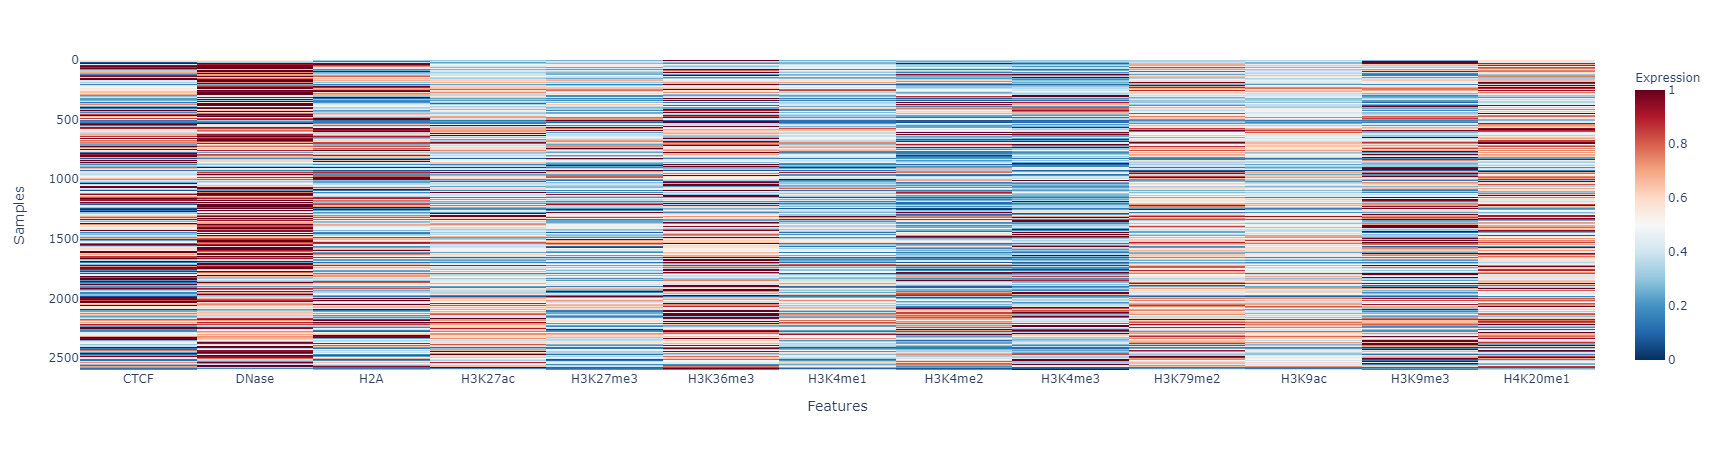

In [56]:
import plotly.express as px
from sklearn.preprocessing import Normalizer

normalized_data = Normalizer(norm = 'max').transform(data[0])

dataL = data[2].tolist()
xList = dataL


uo_hm_fig = px.imshow(normalized_data, #data_pts - euclidean distance values
                labels=dict(x="Features", y="Samples", color="Expression"),
                #template = 'plotly',
                color_continuous_scale='RdBu_r', #RdBu,
                x=xList
                #y=]
               )

uo_hm_fig.show()

# Ordered Clustermap

In [59]:
import pandas as pd
import seaborn as sns

import scipy
from scipy.spatial import distance
from scipy.cluster import hierarchy

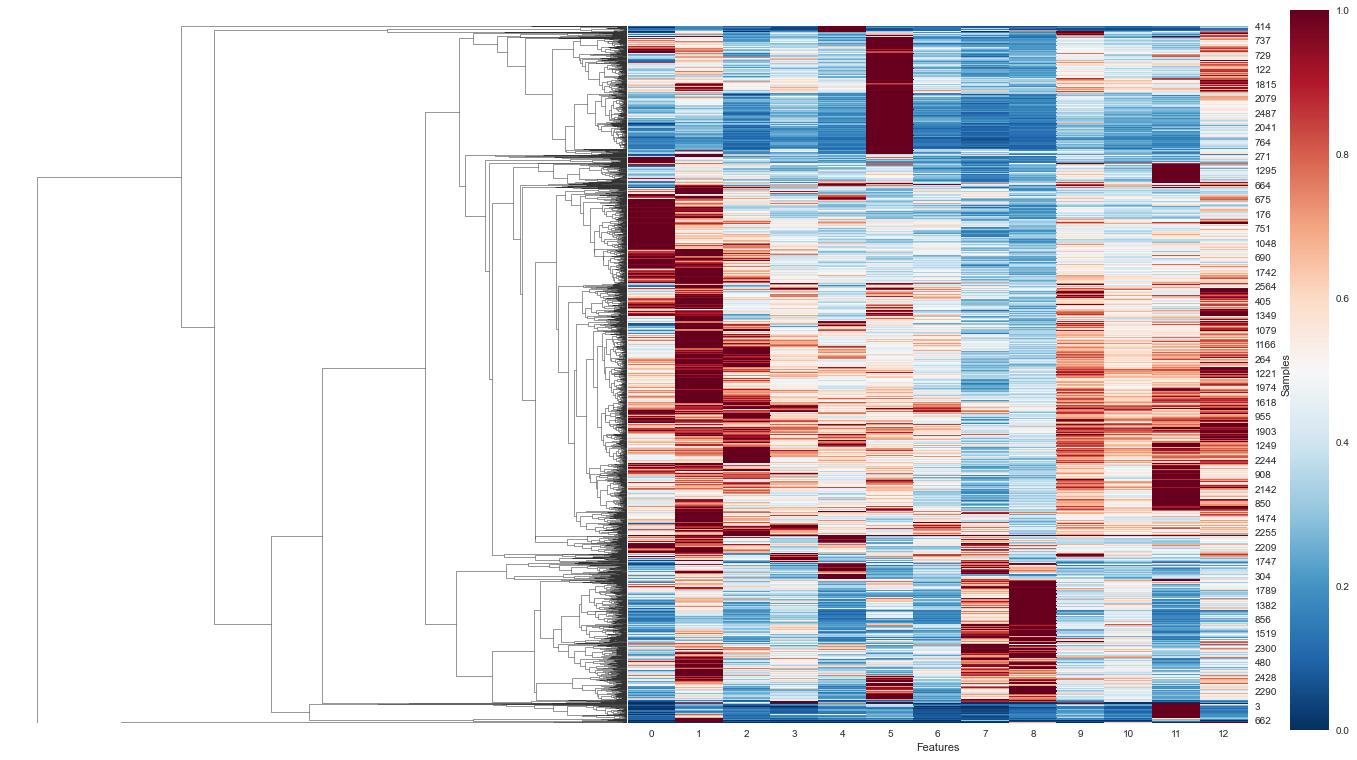

In [60]:
dataL = data[0].tolist()
#sns.clustermap(labeled.sort_values('labels').iloc[:,0:-1], z_score=0)
sample_cluster_map = sns.clustermap(normalized_data, cmap = 'RdBu_r', #plasma, RdBu
                                   figsize=(18, 20), #linewidths = 0.001,
                                   metric = 'cosine', row_cluster = True,
                                   col_cluster=False,
                                   #row_colors = row_colors,
                                   dendrogram_ratio=(.5, .5),
                                   cbar_pos=(1, 0.015, .03, .5)
                                   #z_score=0 #standardize z-score - 0(rows) 1(cols)
                                    #subtract the minimum and divide each by its maximum
                                   )
#‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’,‘euclidean’, ‘hamming’, ‘jaccard’,‘kulsinski’, ....
sample_cluster_map.ax_heatmap.set_xlabel('Features')
sample_cluster_map.ax_heatmap.set_ylabel('Samples')
sample_cluster_map.ax_col_dendrogram.remove()

#plt.savefig(out_pdf)
###   access linkage matricies for rows/columns   ###
#clustmap = sns.clustermap(df, metric="correlation")
#clustmap.dendrogram_col.linkage # linkage matrix for columns
#clustmap.dendrogram_row.linkage # linkage matrix for rows


# Average Clustermap

In [ ]:
#data[0] - euclidean distance
#normalized_data - cosine distance
sample_cluster_map = sns.clustermap(normalized_data, cmap = 'RdBu_r', #plasma, RdBu
                                   figsize=(18, 20), #linewidths = 0.001,
                                   metric = 'cosine', row_cluster = True,
                                   col_cluster=False,
                                   #row_colors = row_colors,
                                   dendrogram_ratio=(.5, .5),
                                   cbar_pos=(1, 0.015, .03, .5)
                                   #z_score=0 #standardize z-score - 0(rows) 1(cols)
                                    #subtract the minimum and divide each by its maximum
                                   )
#‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’,‘euclidean’, ‘hamming’, ‘jaccard’,‘kulsinski’, ....
sample_cluster_map.ax_heatmap.set_xlabel('Features')
sample_cluster_map.ax_heatmap.set_ylabel('Samples')
sample_cluster_map.ax_col_dendrogram.remove()

# Dendrogram + Correlation Map

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
data = np.genfromtxt('h1.csv',
                     names=True,usecols=tuple(range(0,13)),dtype=float, delimiter=",")

#dendro_plt = ff.create_dendrogram(data_pts, 
#                           #orientation='left',
#                           linkagefun=lambda x: linkage(data_pts, 'average', metric='euclidean'),
#                           #distfun='euclidean', 
#                           color_threshold=200)
#dendro_plt.update_layout(width=1000, height=800)
#dendro_plt.show()

In [ ]:
data_array = data.view((np.float, len(data.dtype.names)))

data_array

In [ ]:
#data_array = data_array.transpose()

#data_array.shape
data_array

In [ ]:
labels = data.dtype.names

# Initialize figure by creating upper dendrogram
dendro_plt = ff.create_dendrogram(data_array, orientation='bottom')#, labels=labels)

dendro_plt.show()

In [ ]:

for i in range(len(dendro_plt['data'])):
    dendro_plt['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    dendro_plt.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'rdbu' #rdbu
    )
]

heatmap[0]['x'] = dendro_plt['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    dendro_plt.add_trace(data)

# Edit Layout
dendro_plt.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
dendro_plt.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
dendro_plt.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
dendro_plt.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
dendro_plt.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
dendro_plt.show()